# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(color_codes=True)
%matplotlib inline

---
## 2. Load data

In [2]:
df = pd.read_csv('/content/clean_eda_data.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   

  mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0          12.311304                8.182687      1  
1           0.000000                0.000000      0  
2           0.088409                0.000000      0  

[3 rows x 51 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('/content/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [6]:
eda_data = pd.merge(df, diff, on='id')

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
eda_data.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  

In [9]:
eda_data.tail()

Unnamed: 0                                id  \
14600       14600  18463073fb097fc0ac5d3e040f356987   
14601       14601  d0a6f71671571ed83b2645d23af6de00   
14602       14602  10e6828ddd62cbcf687cb74928c4c2d2   
14603       14603  1cf20fd6206d7678d5bcafd28c53b4db   
14604       14604  563dde550fd624d7352f3de77c0cdfcd   

                          channel_sales  cons_12m  cons_gas_12m  \
14600  foosdfpfkusacimwkcsosbicdxkicaua     32270         47940   
14601  foosdfpfkusacimwkcsosbicdxkicaua      7223             0   
14602  foosdfpfkusacimwkcsosbicdxkicaua      1844             0   
14603  foosdfpfkusacimwkcsosbicdxkicaua       131             0   
14604                           MISSING      8730             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
14600                0 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14601              181 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14602              179 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14603                0 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14604                0 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
14600            4648.01                   0                       0.0   
14601             631.69                 181                       0.0   
14602             190.39                 179                       0.0   
14603              19.34                   0                       0.0   
14604             762.41                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14600                    18.57                        0.138305   
14601                   144.03                        0.100167   
14602                   129.60                        0.116900   
14603                     7.18                        0.145711   
14604                     1.07                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
14600                    0.000000                    44.311378       t   
14601                    0.091892                    58.995952       f   
14602                    0.100015                    40.606701       f   
14603                    0.000000                    44.311378       f   
14604                    0.088454                    45.311378       f   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
14600      0.00                 27.88               27.88            2   
14601     15.94                  0.00                0.00            1   
14602     18.05                 39.84               39.84            1   
14603      0.00                 13.08               13.08            1   
14604      0.00                 11.84               11.84            1   

       net_margin  num_years_antig                         origin_up  pow_max  \
14600      381.77                4  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14601       90.34                3  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14602       20.38                4  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14603        0.96                3  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14604       96.34                6  ldkssxwpmemidmecebumciepifcamkci   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015

In [10]:
eda_data.sample(10)

Unnamed: 0                                id  \
14049       14049  f1ca1ef6dab11dc997b84d9faede5261   
1522         1522  fd080b2597d33530ced11a33269c0555   
877           877  2f19202d9fa1590f48e493474fb90d5b   
12833       12833  facb2a7273b6f181d0255f1ee94bd0a6   
3168         3168  dcd3c530c79aad688d1cd265349c03a9   
1437         1437  471a911d1a509d0ab960f79893d7f89f   
7540         7540  3f649cc6d6ca1a88f9493be26f8e9395   
5620         5620  b77e5e18da2aace6e6418eae66b27399   
10             10  d5e512dbc8118a830a7b8c7f61d89992   
10682       10682  d76862d85b327aa535a25f78a5597da4   

                          channel_sales  cons_12m  cons_gas_12m  \
14049  foosdfpfkusacimwkcsosbicdxkicaua     63810             0   
1522   lmkebamcaaclubfxadlmueccxoimlema   3550287       1401366   
877                             MISSING      3568             0   
12833  foosdfpfkusacimwkcsosbicdxkicaua      5397             0   
3168                            MISSING       875             0   
1437   usilxuppasemubllopkaafesmlibmsdf     17760             0   
7540                            MISSING     45455         33853   
5620   foosdfpfkusacimwkcsosbicdxkicaua      7781             0   
10     usilxuppasemubllopkaafesmlibmsdf     10831             0   
10682                           MISSING      4358             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
14049             7131 2012-04-24 2017-01-22      2015-01-22   2016-01-24   
1522            386468 2012-02-17 2016-02-17      2012-02-17   2015-02-18   
877                304 2009-10-26 2016-10-25      2009-10-26   2015-10-28   
12833                0 2011-07-01 2016-07-01      2011-07-01   2015-07-04   
3168                 0 2011-06-07 2016-06-07      2011-06-07   2015-06-08   
1437                 0 2012-10-24 2016-10-24      2015-05-24   2015-10-25   
7540              2794 2009-09-21 2016-03-26      2014-03-26   2015-03-29   
5620               643 2010-11-09 2016-11-09      2015-11-01   2015-11-10   
10                3112 2011-07-11 2016-07-11      2011-07-11   2015-07-12   
10682                0 2010-01-19 2017-01-19      2015-11-18   2016-01-20   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
14049             404.89                 470                       0.0   
1522             4078.44                4426                       0.0   
877               353.24                 304                       0.0   
12833             162.48                   0                       0.0   
3168              131.52                   0                       0.0   
1437             1804.57                   0                       0.0   
7540             1473.15                   0                       0.0   
5620              797.41                 643                       0.0   
10               1204.58                3112                       0.0   
10682             548.50                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14049                    18.46                        0.139751   
1522                    132.46                        0.116900   
877                     131.06                        0.115237   
12833                    32.61                        0.145711   
3168                     18.36                        0.145711   
1437                    119.41                        0.116509   
7540                      8.27                        0.142065   
5620                    128.55                        0.115939   
10                       20.94                        0.164637   
10682                    16.29                        0.162327   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
14049                    0.000000                    44.311378       f   
1522                     0.100015                    40.606701       t   
877                      0.100123                  

## Average price changes as time passes

By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that our colleague created.

In [11]:
# Aggregate average prices per period by company

mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                            'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                            'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [12]:
# Calculate the mean difference between consecutive periods

mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [13]:
columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

In [14]:
eda_data = pd.merge(eda_data, mean_prices[columns], on='id')

In [15]:
eda_data.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  

In [16]:
eda_data.tail()

Unnamed: 0                                id  \
14600       14600  18463073fb097fc0ac5d3e040f356987   
14601       14601  d0a6f71671571ed83b2645d23af6de00   
14602       14602  10e6828ddd62cbcf687cb74928c4c2d2   
14603       14603  1cf20fd6206d7678d5bcafd28c53b4db   
14604       14604  563dde550fd624d7352f3de77c0cdfcd   

                          channel_sales  cons_12m  cons_gas_12m  \
14600  foosdfpfkusacimwkcsosbicdxkicaua     32270         47940   
14601  foosdfpfkusacimwkcsosbicdxkicaua      7223             0   
14602  foosdfpfkusacimwkcsosbicdxkicaua      1844             0   
14603  foosdfpfkusacimwkcsosbicdxkicaua       131             0   
14604                           MISSING      8730             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
14600                0 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14601              181 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14602              179 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14603                0 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14604                0 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
14600            4648.01                   0                       0.0   
14601             631.69                 181                       0.0   
14602             190.39                 179                       0.0   
14603              19.34                   0                       0.0   
14604             762.41                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14600                    18.57                        0.138305   
14601                   144.03                        0.100167   
14602                   129.60                        0.116900   
14603                     7.18                        0.145711   
14604                     1.07                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
14600                    0.000000                    44.311378       t   
14601                    0.091892                    58.995952       f   
14602                    0.100015                    40.606701       f   
14603                    0.000000                    44.311378       f   
14604                    0.088454                    45.311378       f   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
14600      0.00                 27.88               27.88            2   
14601     15.94                  0.00                0.00            1   
14602     18.05                 39.84               39.84            1   
14603      0.00                 13.08               13.08            1   
14604      0.00                 11.84               11.84            1   

       net_margin  num_years_antig                         origin_up  pow_max  \
14600      381.77                4  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14601       90.34                3  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14602       20.38                4  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14603        0.96                3  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14604       96.34                6  ldkssxwpmemidmecebumciepifcamkci   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015

In [17]:
eda_data.sample(10)

Unnamed: 0                                id  \
2656         2656  ab3dea5cf349abfa77161a8cb1f1e662   
1664         1664  8455b5525abd2b19880886efa2cd37d2   
9435         9435  abe2a2f9cbc15caaebc51b9037c7cf6d   
10621       10621  77b34f7c053aad7f83fef2fef59b7153   
4009         4009  b567568d9389c5f4197b404da8a9160b   
13702       13702  82f9ed621c3fc8a77dac00418ce678b3   
1634         1634  2ce34a4bb1d04982f84346feeb2e4f3b   
8881         8881  78c732d61feb0a7203d40536695a54bd   
7984         7984  4d8b9246612b29fd2060d381d7d90b53   
5620         5620  b77e5e18da2aace6e6418eae66b27399   

                          channel_sales  cons_12m  cons_gas_12m  \
2656   foosdfpfkusacimwkcsosbicdxkicaua     10901          1904   
1664                            MISSING     43106             0   
9435   ewpakwlliwisiwduibdlfmalxowmwpci     80921             0   
10621  lmkebamcaaclubfxadlmueccxoimlema      7364             0   
4009                            MISSING    718782             0   
13702  foosdfpfkusacimwkcsosbicdxkicaua     19731         82430   
1634   lmkebamcaaclubfxadlmueccxoimlema      4927             0   
8881   foosdfpfkusacimwkcsosbicdxkicaua     13788         76725   
7984   usilxuppasemubllopkaafesmlibmsdf     12476            32   
5620   foosdfpfkusacimwkcsosbicdxkicaua      7781             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
2656               815 2013-05-29 2016-05-29      2015-11-01   2015-06-01   
1664              4538 2009-09-15 2016-09-15      2015-05-24   2015-09-16   
9435              4320 2012-02-02 2016-09-05      2012-02-02   2015-09-06   
10621             2921 2012-08-14 2016-08-13      2014-07-08   2015-08-15   
4009             38979 2008-07-24 2016-05-20      2008-07-24   2015-05-22   
13702                0 2011-02-23 2016-02-23      2015-12-17   2015-02-26   
1634                 0 2010-07-15 2016-07-15      2010-07-15   2015-07-16   
8881               925 2009-12-03 2016-12-03      2015-11-01   2015-12-04   
7984               132 2010-10-19 2016-10-19      2015-09-20   2015-10-20   
5620               643 2010-11-09 2016-11-09      2015-11-01   2015-11-10   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
2656              972.51                 653                       0.0   
1664             4375.56                4538                       0.0   
9435             7774.73                4320                       0.0   
10621             727.09                2921                       0.0   
4009             6596.30                5015                       0.0   
13702            2226.63                   0                       0.0   
1634              311.96                   0                       0.0   
8881               62.96                   0                       0.0   
7984              499.28                 132                       0.0   
5620              797.41                 643                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
2656                    129.24                        0.116910   
1664                    131.38                        0.115237   
9435                    132.58                        0.111125   
10621                   123.70                        0.116910   
4009                    142.22                        0.113323   
13702                    19.39                        0.141838   
1634                     15.55                        0.166950   
8881                     79.13                        0.144038   
7984                    131.76                        0.115360   
5620                    128.55                        0.115939   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
2656                     0.100572                    40.606701       t   
1664                     0.100123                    40.606701       f   
9435                     0.094787                  

This feature may be helpful because it enhances the already useful functionality that my colleague found by adding more granularity. We now have features that look at mean average price disparities across various time periods rather than differences over the course of a year (off_peak, peak, mid_peak). While inter-time-period features may reveal patterns on a micro scale between months, the Dec-Jan feature may indicate macro trends that happen over the course of an entire year.

## Max price changes across periods and months

Looking at the largest price variation between periods and months is another method we can improve the functionality from our colleague.

In [18]:
# Aggregate average prices per period by company

mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                     'price_peak_var': 'mean', 
                                                                     'price_mid_peak_var': 'mean', 
                                                                     'price_off_peak_fix': 'mean', 
                                                                     'price_peak_fix': 'mean', 
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

In [19]:
# Calculate the mean difference between consecutive periods

mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [20]:
# Calculate the maximum monthly difference across time periods

max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [21]:
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

eda_data = pd.merge(eda_data, max_diff_across_periods_months[columns], on='id')

In [22]:
eda_data.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  

In [23]:
eda_data.tail()

Unnamed: 0                                id  \
14600       14600  18463073fb097fc0ac5d3e040f356987   
14601       14601  d0a6f71671571ed83b2645d23af6de00   
14602       14602  10e6828ddd62cbcf687cb74928c4c2d2   
14603       14603  1cf20fd6206d7678d5bcafd28c53b4db   
14604       14604  563dde550fd624d7352f3de77c0cdfcd   

                          channel_sales  cons_12m  cons_gas_12m  \
14600  foosdfpfkusacimwkcsosbicdxkicaua     32270         47940   
14601  foosdfpfkusacimwkcsosbicdxkicaua      7223             0   
14602  foosdfpfkusacimwkcsosbicdxkicaua      1844             0   
14603  foosdfpfkusacimwkcsosbicdxkicaua       131             0   
14604                           MISSING      8730             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
14600                0 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14601              181 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14602              179 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14603                0 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14604                0 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
14600            4648.01                   0                       0.0   
14601             631.69                 181                       0.0   
14602             190.39                 179                       0.0   
14603              19.34                   0                       0.0   
14604             762.41                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14600                    18.57                        0.138305   
14601                   144.03                        0.100167   
14602                   129.60                        0.116900   
14603                     7.18                        0.145711   
14604                     1.07                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
14600                    0.000000                    44.311378       t   
14601                    0.091892                    58.995952       f   
14602                    0.100015                    40.606701       f   
14603                    0.000000                    44.311378       f   
14604                    0.088454                    45.311378       f   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
14600      0.00                 27.88               27.88            2   
14601     15.94                  0.00                0.00            1   
14602     18.05                 39.84               39.84            1   
14603      0.00                 13.08               13.08            1   
14604      0.00                 11.84               11.84            1   

       net_margin  num_years_antig                         origin_up  pow_max  \
14600      381.77                4  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14601       90.34                3  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14602       20.38                4  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14603        0.96                3  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14604       96.34                6  ldkssxwpmemidmecebumciepifcamkci   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015

In [24]:
eda_data.sample(10)

Unnamed: 0                                id  \
12738       12738  2d45b170e4094729da1c7ae7fa4c8b8b   
11954       11954  92067087ea6be539eb164643a0d2dd03   
8049         8049  48cd821867e768dd376da9fa9b9a3063   
4273         4273  286bb4484daf8871643c6c51de3d3051   
6886         6886  d927f362c9039e51ebbeca790642fde7   
10327       10327  0a12a439018be2c8e029d3ead264cb14   
8273         8273  5d8f0783afa05dd15389c964804fe180   
6825         6825  6d585ce23b5fa7853e387a078cd58f63   
2600         2600  45950081a8da5dabdf4e05c7b7cbd5ac   
9133         9133  1fd3974f7ba0b35891fcfeb102a42f64   

                          channel_sales  cons_12m  cons_gas_12m  \
12738  lmkebamcaaclubfxadlmueccxoimlema   4306656        888994   
11954  foosdfpfkusacimwkcsosbicdxkicaua    133782             0   
8049   ewpakwlliwisiwduibdlfmalxowmwpci      1253          2414   
4273   lmkebamcaaclubfxadlmueccxoimlema      7832             0   
6886                            MISSING     30029             0   
10327  foosdfpfkusacimwkcsosbicdxkicaua     52060             0   
8273   foosdfpfkusacimwkcsosbicdxkicaua     11904             0   
6825   foosdfpfkusacimwkcsosbicdxkicaua     10351             0   
2600   foosdfpfkusacimwkcsosbicdxkicaua     32861             0   
9133   foosdfpfkusacimwkcsosbicdxkicaua     13802             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
12738           479030 2010-11-02 2016-11-02      2010-11-02   2015-11-04   
11954            10702 2010-10-02 2016-10-02      2010-10-02   2015-10-04   
8049                 0 2010-02-24 2016-02-24      2010-02-24   2015-02-25   
4273               585 2012-04-13 2016-04-12      2013-11-05   2015-04-13   
6886                 0 2009-12-04 2016-12-04      2015-10-30   2015-12-06   
10327              294 2010-01-22 2017-01-22      2010-01-22   2016-01-24   
8273              1185 2012-05-28 2016-05-28      2015-04-15   2015-05-31   
6825               657 2009-09-23 2016-09-23      2015-08-26   2015-09-25   
2600              2388 2010-10-16 2016-10-16      2010-10-16   2015-10-18   
9133                 0 2012-05-17 2016-05-17      2012-05-17   2015-05-18   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
12738            1626.57                1439                       0.0   
11954            7115.78                4668                       0.0   
8049              189.90                   0                       0.0   
4273              786.25                 585                       0.0   
6886             4419.48                   0                       0.0   
10327            5292.51                 294                       0.0   
8273              856.06                 537                       0.0   
6825              785.54                 657                       0.0   
2600             3346.22                2388                       0.0   
9133             1408.72                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
12738                    16.16                        0.146348   
11954                   145.80                        0.114658   
8049                     15.40                        0.146694   
4273                    130.09                        0.115174   
6886                     16.11                        0.144058   
10327                   142.75                        0.115744   
8273                     15.69                        0.142822   
6825                    152.32                        0.114667   
2600                    147.17                        0.115237   
9133                    128.56                        0.116910   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
12738                    0.000000                    45.308378       t   
11954                    0.099545                    40.606701       f   
8049                     0.000000                  

In [25]:
eda_data.drop('Unnamed: 0',axis=1, inplace=True)

In [26]:
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.6881

 In an effort to consider the viewpoint of a PowerCo client, I believed that calculating the maximum price change across months and time periods would be a useful feature to develop. Nothing irritates me more as a utility customer than unexpected price changes between months, and a significant price increase within a short period of time would prompt me to shop around for a better deal with other utilities providers. For this use case, we are attempting to predict churn, thus I thought it would be interesting to integrate this feature.

# BONUS - Feature Engineering

Tenure

    How long a company has been a client of PowerCo.


In [27]:
eda_data['tenure'] = ((eda_data['date_end'] - eda_data['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [28]:
eda_data.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

As we can see, clients who have just been with us for four months or less are significantly more likely to leave than those who have been with us for longer. Intriguingly, compared to other variances between ordered tenure values, the difference between 4 and 5 months is around 4%, which signifies a significant increase in the risk that a client will leave. This may indicate that keeping a customer through the 4-month mark is actually a significant accomplishment in terms of retaining them as a long-term customer.

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [29]:
def convert_months(reference_date, eda_data, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - eda_data[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [30]:
# Create reference date

reference_date = datetime(2016, 1, 1)

In [31]:
# Create columns

eda_data['months_activ'] = convert_months(reference_date, eda_data, 'date_activ')
eda_data['months_to_end'] = -convert_months(reference_date, eda_data, 'date_end')
eda_data['months_modif_prod'] = convert_months(reference_date, eda_data, 'date_modif_prod')
eda_data['months_renewal'] = convert_months(reference_date, eda_data, 'date_renewal')

### Insights :

- Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

- Using intuition, we could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the months_activ feature.

- As well as this, if we think from the perspective of a client with PowerCo, if we are coming toward the end of our contract with PowerCo our thoughts could go a few ways. We could be looking for better deals for when our contract ends, or we might want to see out our contract and sign another one. One the other hand if we have only just joined, we may have a period where we are allowed to leave if we are not satisfied. Furthermore, if we are in the middle of our contract, their may be charges if we wanted to leave, deterring clients from churning mid-way through their agreement. So, I think months_to_end will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

- My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe months_modif_prod will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

- Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe months_renewal will be a good feature to include.

In [32]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them

remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

In [33]:
eda_data = eda_data.drop(columns=remove)

In [34]:
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.688156                 24.412893   

   mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
0                     14.901340                 41.067053   
1                      0.000000                 44.460984   
2                      0.000000                 44.555962   
3                      0.000000                 44.551475   

In [35]:
eda_data.tail()

id                     channel_sales  \
14600  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14601  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14602  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14603  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14604  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
14600     32270         47940                0            4648.01   
14601      7223             0              181             631.69   
14602      1844             0              179             190.39   
14603       131             0                0              19.34   
14604      8730             0                0             762.41   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
14600                   0                       0.0                    18.57   
14601                 181                       0.0                   144.03   
14602                 179                       0.0                   129.60   
14603                   0                       0.0                     7.18   
14604                   0                       0.0                     1.07   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
14600                        0.138305                    0.000000   
14601                        0.100167                    0.091892   
14602                        0.116900                    0.100015   
14603                        0.145711                    0.000000   
14604                        0.167086                    0.088454   

       forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
14600                    44.311378       t      0.00                 27.88   
14601                    58.995952       f     15.94                  0.00   
14602                    40.606701       f     18.05                 39.84   
14603                    44.311378       f      0.00                 13.08   
14604                    45.311378       f      0.00                 11.84   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
14600               27.88            2      381.77                4   
14601                0.00            1       90.34                3   
14602               39.84            1       20.38                4   
14603               13.08            1        0.96                3   
14604               11.84            1       96.34                6   

                              origin_up  pow_max  \
14600  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14601  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14602  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14603  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14604  ldkssxwpmemidmecebumciepifcamkci   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015674   
14602                      0.073160                     40.701732   
14603                      0.000000                     44.311375   
14604                      0.000000                     44.266930   

       mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
14600                  0.000000                      0.000000   
14601                 36.393379                      8.345418   
14602                 24.421038                     1

In [36]:
eda_data.sample(10)

id                     channel_sales  \
11264  06f4b70d84cb0e3788c3b026f02d826d  foosdfpfkusacimwkcsosbicdxkicaua   
6578   29ce64b1c11f5f2205a932c21570dd68  foosdfpfkusacimwkcsosbicdxkicaua   
2954   69fe6cdae8084fb52d6aea879d2059f3                           MISSING   
12170  6a126cd4205080dd448dde5d8a05f1fd  foosdfpfkusacimwkcsosbicdxkicaua   
552    c129f899fd39518aead895386b6f276c  foosdfpfkusacimwkcsosbicdxkicaua   
12983  a00aa870559dae791e6aac340182d462  foosdfpfkusacimwkcsosbicdxkicaua   
2640   2eb94fcddd3d7c56c0045012ac12c9a1  foosdfpfkusacimwkcsosbicdxkicaua   
1391   c4532f251155c6eb166332dc6dab2fa3  foosdfpfkusacimwkcsosbicdxkicaua   
1798   c965fd886b88a2a2ce86d3aeffcf351e                           MISSING   
6606   8cdb7dc994129bf0368223f43fe9d6a2                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
11264      2260             0              210             223.13   
6578      66750             0             5964            6464.12   
2954     283608        257745            18035            7991.75   
12170     15178             0             1098            1533.34   
552     1047446             0           115623             774.04   
12983     18426             0                0            2015.53   
2640       5582             0              258             599.67   
1391       7396             0                0             782.76   
1798       7712             0                0            1158.80   
6606      51421             0             4110             361.67   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
11264                 210                       0.0                   131.02   
6578                 5964                       0.0                     0.00   
2954                    0                       0.0                   142.59   
12170                1098                       0.0                   129.96   
552                  1255                       0.0                   170.79   
12983                   0                       0.0                    14.79   
2640                  258                       0.0                   130.44   
1391                    0                       0.0                    17.50   
1798                    0                       0.0                   144.91   
6606                    0                       0.0                    14.91   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
11264                        0.116900                    0.100015   
6578                         0.114586                    0.097701   
2954                         0.113323                    0.096984   
12170                        0.114782                    0.099665   
552                          0.115174                    0.098837   
12983                        0.160590                    0.083332   
2640                         0.115174                    0.098837   
1391                         0.165793                    0.088539   
1798                         0.145711                    0.000000   
6606                         0.166950                    0.089695   

       forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
11264                    40.606701       f     20.28                 37.17   
6578                     40.606701       f    562.72                 56.35   
2954                     40.606701       t      0.00                  7.44   
12170                    40.606701       f    106.59                 13.31   
552                      40.606701       f    109.76                 81.57   
12983                    44.311378       f      0.00                 11.42   
2640                     40.606701       f     25.54                 28.89   
1391                     44.311378       f      0.00                 10.08   
1798                     44.311378       f      0.00                 12.36   
6606    

## Transforming Boolean data

has_gas

We simply want to transform this column from being categorical to being a binary flag

In [37]:
eda_data['has_gas'] = eda_data['has_gas'].replace(['t', 'f'], [1, 0])
eda_data.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

If a consumer also purchases gas from PowerCo, it demonstrates that they are a brand-loyal customer who purchases various items. Therefore, it comes as no surprise that consumers who do not purchase gas are roughly 2% more likely to churn than those who do. Consequently, this function is helpful.

## Transforming Categorical Data

A predictive model cannot accept categorical or string values, hence as a data scientist we need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present 0 < 1 < 2 < 3 ...

Another way to encode categorical features is to use dummy variables also known as one hot encoding. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

## channel_sales

In [38]:
# Transform into categorical type

eda_data['channel_sales'] = eda_data['channel_sales'].astype('category')

In [39]:
# Let's see how many categories are within this column

print("\n ----- Value Counts of Channel Sales ----- \n")
eda_data['channel_sales'].value_counts()



 ----- Value Counts of Channel Sales ----- 



foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as we can see the last 3 categories in the output above, shows that they only have 11, 3 and 2 occurrences respectively. Since they're almost entirely a constant value and provide very little.

For this reason, we will drop these 3 dummy variables.

In [40]:
eda_data = pd.get_dummies(eda_data, columns=['channel_sales'], prefix='channel')

In [41]:
eda_data = eda_data.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 
                                  'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                                  'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])

In [42]:
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig                         origin_up  pow_max  \
0                3  lxidpiddsbxsbosboudacockeimpuepw   43.648   
1                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800   
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856   
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200   
4                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.124787                  0.100749   
1                      0.149609                  0.007124   
2                      0.170512                  0.088421   
3                      0.151210                  0.000000   
4                      0.124174                  0.103638   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.066530                     40.942265   
1                      0.000000                     44.311375   
2                      0.000000                     44.385450   
3                      0.000000                     44.400265   
4                      0.072865                     40.688156   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 22.352010                     14.901340   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.412893                     16.275263   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 41.067053             22.452760                 14.967871   
1                 44.460984              0.007124                  0.000000   
2                 44.555962              0.088421                  0.000000   
3     

In [43]:
eda_data.tail()

id  cons_12m  cons_gas_12m  \
14600  18463073fb097fc0ac5d3e040f356987     32270         47940   
14601  d0a6f71671571ed83b2645d23af6de00      7223             0   
14602  10e6828ddd62cbcf687cb74928c4c2d2      1844             0   
14603  1cf20fd6206d7678d5bcafd28c53b4db       131             0   
14604  563dde550fd624d7352f3de77c0cdfcd      8730             0   

       cons_last_month  forecast_cons_12m  forecast_cons_year  \
14600                0            4648.01                   0   
14601              181             631.69                 181   
14602              179             190.39                 179   
14603                0              19.34                   0   
14604                0             762.41                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
14600                       0.0                    18.57   
14601                       0.0                   144.03   
14602                       0.0                   129.60   
14603                       0.0                     7.18   
14604                       0.0                     1.07   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
14600                        0.138305                    0.000000   
14601                        0.100167                    0.091892   
14602                        0.116900                    0.100015   
14603                        0.145711                    0.000000   
14604                        0.167086                    0.088454   

       forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
14600                    44.311378        1      0.00                 27.88   
14601                    58.995952        0     15.94                  0.00   
14602                    40.606701        0     18.05                 39.84   
14603                    44.311378        0      0.00                 13.08   
14604                    45.311378        0      0.00                 11.84   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
14600               27.88            2      381.77                4   
14601                0.00            1       90.34                3   
14602               39.84            1       20.38                4   
14603               13.08            1        0.96                3   
14604               11.84            1       96.34                6   

                              origin_up  pow_max  \
14600  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14601  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14602  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14603  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14604  ldkssxwpmemidmecebumciepifcamkci   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015674   
14602                      0.073160                     40.701732   
14603                      0.000000                     44.311375   
14604                      0.000000                     44.266930   

       mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
14600                  0.000000                      0.000000   
14601                 36.393379                      8.345418   
14602                 24.421038                     16.280694   
14603                  0.000000                      0.000000   
14604                  0.000000                      0.000000   

       mean_year_price_off_peak  mean_year_price_peak  

In [44]:
eda_data.sample(10)

id  cons_12m  cons_gas_12m  \
5524   ccbfca433a7abcb2aba36635472e4daf      8081             0   
9112   f28ab35719ff7c3a13e24ee795d13334      6061             0   
5596   f8858406977a4d85c113467aa0d90c13     18607             0   
5628   98a48424d6bd1913249c77c1b3de0d0a     19693             0   
11288  5ea0f3d017d811880e9b89ec3eec7690      5266             0   
8471   e0964ec5c7d4a92ca9ddbb91d76a9a31     56267             0   
2967   b746de6b42881983735c2bdec1a3583f       868             0   
10332  758351e7c75731eec8d90ae98bc0bc51      2687             0   
11146  18aa0ad6bdd7ea820304138045e5d754      6068             0   
14324  72bec7dc858058363d6829d54c2746d7      8283          8903   

       cons_last_month  forecast_cons_12m  forecast_cons_year  \
5524               997             821.50                 997   
9112               660               0.00                 660   
5596                 0             652.15                   0   
5628              3619            2905.72                3619   
11288                0             557.44                   0   
8471              8671            8355.20                8671   
2967               133              84.74                 133   
10332              248             265.77                 248   
11146             2312             662.13                2312   
14324              252             975.61                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
5524                        0.0                   110.50   
9112                        0.0                     0.00   
5596                        0.0                    18.36   
5628                        0.0                     0.00   
11288                       0.0                   140.31   
8471                        0.0                    18.42   
2967                        0.0                   144.65   
10332                       0.0                   118.60   
11146                       0.0                    16.26   
14324                       0.0                    20.49   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
5524                         0.115360                    0.100243   
9112                         0.000000                    0.000000   
5596                         0.146694                    0.000000   
5628                         0.144058                    0.000000   
11288                        0.114667                    0.099548   
8471                         0.144149                    0.000000   
2967                         0.116900                    0.100015   
10332                        0.115182                    0.098841   
11146                        0.162033                    0.084138   
14324                        0.168242                    0.089602   

       forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
5524                     40.606701        0     93.99                 11.01   
9112                      0.000000        0      0.00                 14.26   
5596                     44.311378        0      0.00                 28.50   
5628                     44.311378        0    524.46                  3.40   
11288                    41.105201        0      0.00                 41.40   
8471                     44.311378        0   1266.25                 30.86   
2967                     40.606701        0     12.66                 49.44   
10332                    40.606701        0     23.73                 19.50   
11146                    44.311378        0    223.31                 21.34   
14324                    45.308378        1      0.00                 19.56   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
5524                11.01            1       89.59                3   
9112                14.26            1      114.87                9   
5596                28.50            1       66.91                4   
5628    

## origin_up

In [45]:
# Transform into categorical type

eda_data['origin_up'] = eda_data['origin_up'].astype('category')

In [46]:
# Let's see how many categories are within this column

print("\n ----- Value Counts of Origin Up ----- \n")
eda_data['origin_up'].value_counts()


 ----- Value Counts of Origin Up ----- 



lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Similar to channel_sales the last 3 categories in the output above show very low frequency, so we will remove these from the features after creating dummy variables.

In [47]:
eda_data = pd.get_dummies(eda_data, columns=['origin_up'], prefix='origin_up')

In [48]:
eda_data = eda_data.drop(columns=['origin_up_MISSING', 
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])

In [49]:
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig  pow_max  mean_year_price_off_peak_var  \
0                3   43.648                      0.124787   
1                6   13.800                      0.149609   
2                6   13.856                      0.170512   
3                6   13.200                      0.151210   
4                6   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.688156                 24.412893   

   mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
0                     14.901340                 41.067053   
1                      0.000000                 44.460984   
2                      0.000000                 44.555962   
3                      0.000000                 44.551475   
4                     16.275263                 40.812330   

   mean_year_price_peak  mean_year_price_mid_peak  price_off_peak_var  \
0             22.452760                 14.967871            0.123598   
1              0.007124                  0.000000            0.147851   
2              0.088421                  0.000000            0.168569   
3              0.000000                  0.000000            0.149330   
4    

In [50]:
eda_data.tail()

id  cons_12m  cons_gas_12m  \
14600  18463073fb097fc0ac5d3e040f356987     32270         47940   
14601  d0a6f71671571ed83b2645d23af6de00      7223             0   
14602  10e6828ddd62cbcf687cb74928c4c2d2      1844             0   
14603  1cf20fd6206d7678d5bcafd28c53b4db       131             0   
14604  563dde550fd624d7352f3de77c0cdfcd      8730             0   

       cons_last_month  forecast_cons_12m  forecast_cons_year  \
14600                0            4648.01                   0   
14601              181             631.69                 181   
14602              179             190.39                 179   
14603                0              19.34                   0   
14604                0             762.41                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
14600                       0.0                    18.57   
14601                       0.0                   144.03   
14602                       0.0                   129.60   
14603                       0.0                     7.18   
14604                       0.0                     1.07   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
14600                        0.138305                    0.000000   
14601                        0.100167                    0.091892   
14602                        0.116900                    0.100015   
14603                        0.145711                    0.000000   
14604                        0.167086                    0.088454   

       forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
14600                    44.311378        1      0.00                 27.88   
14601                    58.995952        0     15.94                  0.00   
14602                    40.606701        0     18.05                 39.84   
14603                    44.311378        0      0.00                 13.08   
14604                    45.311378        0      0.00                 11.84   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
14600               27.88            2      381.77                4   15.000   
14601                0.00            1       90.34                3    6.000   
14602               39.84            1       20.38                4   15.935   
14603               13.08            1        0.96                3   11.000   
14604               11.84            1       96.34                6   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015674   
14602                      0.073160                     40.701732   
14603                      0.000000                     44.311375   
14604                      0.000000                     44.266930   

       mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
14600                  0.000000                      0.000000   
14601                 36.393379                      8.345418   
14602                 24.421038                     16.280694   
14603                  0.000000                      0.000000   
14604                  0.000000                      0.000000   

       mean_year_price_off_peak  mean_year_price_peak  \
14600                 44.514760              0.000000   
14601                 59.122473             36.488785   
14602                 40.826071             24.524832   
14603                 44.460984              0.007124   
14604                 44.4355

In [51]:
eda_data.sample(10)

id  cons_12m  cons_gas_12m  \
3762   10f0ac125b8c5d17f5793d4cb33e8668     14632        265768   
7764   f4dc497073640f085b48dcb9321f6096      4336          9314   
893    6043a0fd520659a4c863a5d9ad91296d     18906             0   
9893   7f5da8cb377d2a54b9f633fcec84a8d3      2226          4646   
3812   accf5f4dd7dcdcfbd08f753ceb26e6ec     15327        413642   
9354   149d19d887d7b8a353bb339848306706   5731448             0   
3688   77260ba900bf674b5e504faad5f44117     25269             0   
4587   613d3c16184306d731da7c803f82b2a3      2016             0   
8387   cf438f2cdfc1a205400012da1e3c7941      3690             0   
11848  cf4cd338ffd8cef7a2256a0e003f37c0     28934             0   

       cons_last_month  forecast_cons_12m  forecast_cons_year  \
3762                 0            2168.02                   0   
7764               750             449.53                 750   
893               1635            1873.44                1635   
9893                 0             278.79                   0   
3812              1773            1571.63                1773   
9354            771203            1399.82                1598   
3688              2253            1206.10                1630   
4587                11             204.89                  11   
8387               416             540.06                 416   
11848             2425            1685.13                1624   

       forecast_discount_energy  forecast_meter_rent_12m  \
3762                        0.0                     0.00   
7764                        0.0                   145.01   
893                         0.0                   144.68   
9893                        0.0                    12.51   
3812                        0.0                   146.62   
9354                        0.0                   144.39   
3688                        0.0                   132.14   
4587                        0.0                   129.72   
8387                        0.0                    16.41   
11848                       0.0                   131.78   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
3762                         0.143166                    0.000000   
7764                         0.115237                    0.100123   
893                          0.115237                    0.100123   
9893                         0.165214                    0.087961   
3812                         0.116910                    0.100572   
9354                         0.115174                    0.098837   
3688                         0.116910                    0.100572   
4587                         0.115761                    0.099419   
8387                         0.141434                    0.000000   
11848                        0.115237                    0.100123   

       forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
3762                     44.311378        0      0.00                 23.22   
7764                     40.939027        1     75.87                 23.00   
893                      40.606701        0    159.93                  3.72   
9893                     44.311378        1      0.00                 19.20   
3812                     40.606701        1    180.77                 26.88   
9354                     40.606701        0    143.42                 17.55   
3688                     40.606701        0    158.90                 32.18   
4587                     40.606701        0      1.07                 14.67   
8387                     44.311378        0     59.44                  5.52   
11848                    40.606701        0    159.11                 12.75   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
3762                23.22            1      190.50                4   14.000   
7764                23.00            2       56.17                6   17.250   
893                  3.72            1      224.22  

## Transforming numerical data

-  In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called parametric models, and they typically assume that all variables are both independent and normally distributed.

- Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

- There are many ways that we can treat skewed variables. We can apply transformations such as: 

    *   Square root
    *   Cubic root
    *   Logarithm


to a continuous numeric column and we will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features.

**Note:** We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [52]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

In [53]:
print("\n ----- Statistical Summary of Skewed ----- \n")
eda_data[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



count           mean            std  min  \
cons_12m                        14605.0  159230.267032  573483.629064  0.0   
cons_gas_12m                    14605.0   28091.082506  162978.563803  0.0   
cons_last_month                 14605.0   16091.371448   64366.262314  0.0   
forecast_cons_12m               14605.0    1868.638618    2387.651549  0.0   
forecast_cons_year              14605.0    1399.858747    3247.876793  0.0   
forecast_discount_energy        14605.0       0.966450       5.108355  0.0   
forecast_meter_rent_12m         14605.0      63.090448      66.166636  0.0   
forecast_price_energy_off_peak  14605.0       0.137282       0.024623  0.0   
forecast_price_energy_peak      14605.0       0.050488       0.049037  0.0   
forecast_price_pow_off_peak     14605.0      43.130085       4.486140  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.000000  14116.000000  40764.000000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    793.000000   3383.000000   
forecast_cons_12m                494.980000   1112.610000   2402.270000   
forecast_cons_year                 0.000000    314.000000   1746.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.800000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01

- We can see that the standard deviation for most of these features is quite high.

In [54]:
### Applying log10 transformation

eda_data["cons_12m"] = np.log10(eda_data["cons_12m"] + 1)
eda_data["cons_gas_12m"] = np.log10(eda_data["cons_gas_12m"] + 1)
eda_data["cons_last_month"] = np.log10(eda_data["cons_last_month"] + 1)
eda_data["forecast_cons_12m"] = np.log10(eda_data["forecast_cons_12m"] + 1)
eda_data["forecast_cons_year"] = np.log10(eda_data["forecast_cons_year"] + 1)
eda_data["forecast_meter_rent_12m"] = np.log10(eda_data["forecast_meter_rent_12m"] + 1)
eda_data["imp_cons"] = np.log10(eda_data["imp_cons"] + 1)


## Again Checking the statistics of the skewed features

In [55]:
print("\n ----- Statistical Summary of Skewed ----- \n")
eda_data[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



count       mean       std  min        25%  \
cons_12m                        14605.0   4.223945  0.884545  0.0   3.753966   
cons_gas_12m                    14605.0   0.778978  1.716828  0.0   0.000000   
cons_last_month                 14605.0   2.264801  1.769266  0.0   0.000000   
forecast_cons_12m               14605.0   2.962162  0.683612  0.0   2.695464   
forecast_cons_year              14605.0   1.784733  1.584972  0.0   0.000000   
forecast_discount_energy        14605.0   0.966450  5.108355  0.0   0.000000   
forecast_meter_rent_12m         14605.0   1.517233  0.571489  0.0   1.235023   
forecast_price_energy_off_peak  14605.0   0.137282  0.024623  0.0   0.116340   
forecast_price_energy_peak      14605.0   0.050488  0.049037  0.0   0.000000   
forecast_price_pow_off_peak     14605.0  43.130085  4.486140  0.0  40.606701   

                                      50%        75%        max  
cons_12m                         4.149742   4.610287   6.792889  
cons_gas_12m                     0.000000   0.000000   6.618528  
cons_last_month                  2.899821   3.529430   5.887169  
forecast_cons_12m                3.046733   3.380803   4.918575  
forecast_cons_year               2.498311   3.242293   5.243970  
forecast_discount_energy         0.000000   0.000000  30.000000  
forecast_meter_rent_12m          1.296665   2.120673   2.778376  
forecast_price_energy_off_peak   0.143166   0.146348   0.273963  
forecast_price_energy_peak       0.084138   0.098837   0.195975  
forecast_price_pow_off_peak     44.311378  44.311378  59.266378

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of some of these features too.

<ipython-input-56-a78ae398a804>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((eda_data["cons_12m"].dropna()), ax=axs[0], color='g')
<ipython-input-56-a78ae398a804>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((eda_data[eda_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='

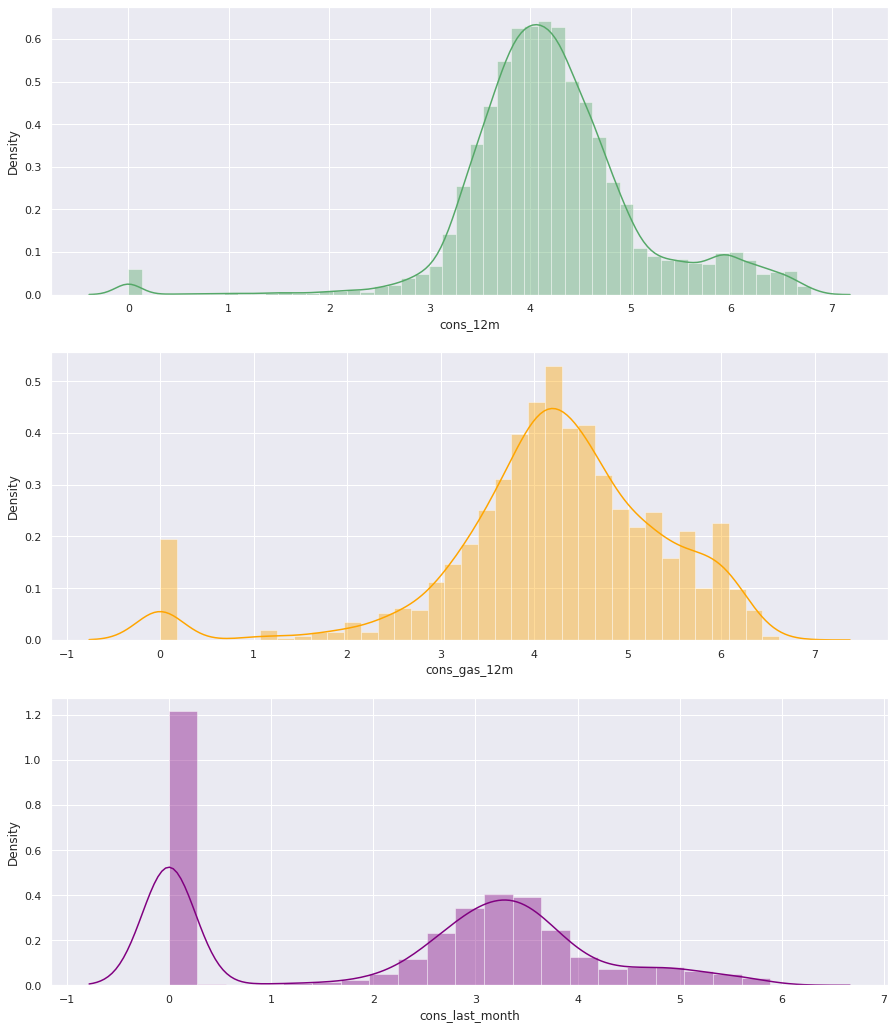

In [56]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))

# Plot histograms

sns.distplot((eda_data["cons_12m"].dropna()), ax=axs[0], color='g')
sns.distplot((eda_data[eda_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
sns.distplot((eda_data["cons_last_month"].dropna()), ax=axs[2], color='purple')

plt.show()

## Checking Correlations of Variables

- In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model.

- For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

- This is important because it reveals the linear relationships between features. We want features to correlate with churn, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

- For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption.

- Ideally, we want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

- So now let's look at how all the features within the model are correlated.

In [57]:
correlation = eda_data.corr()

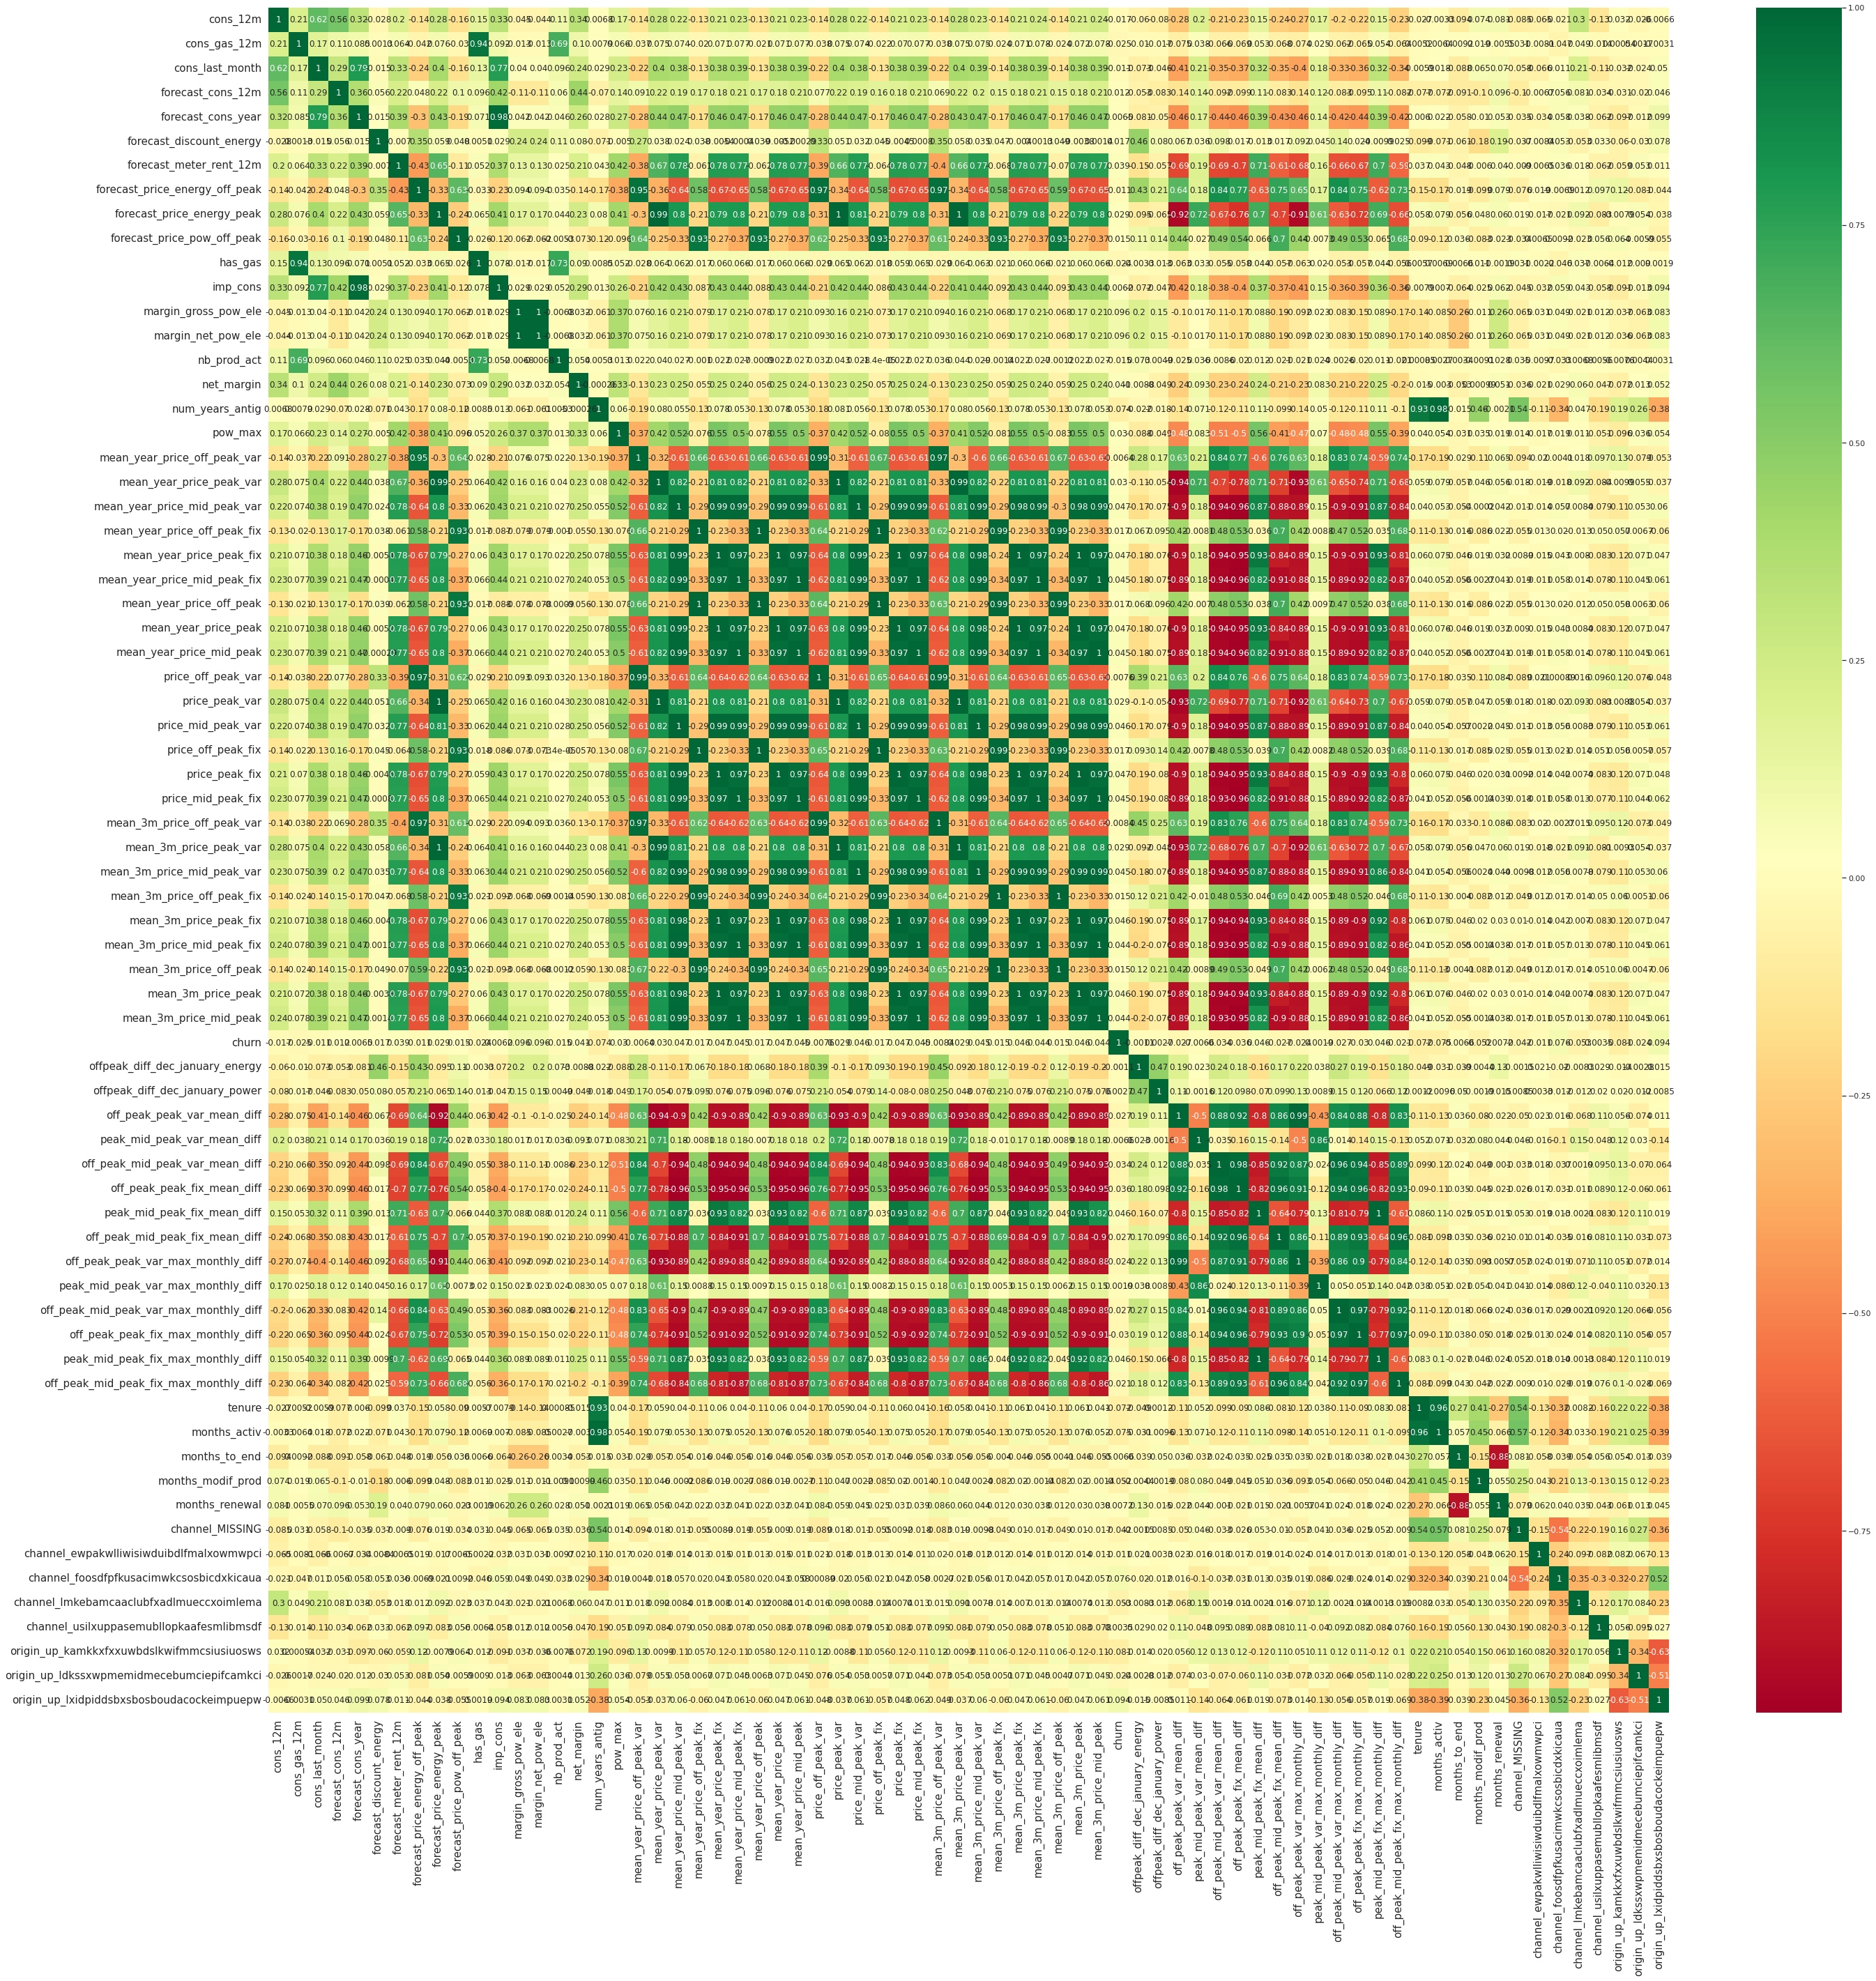

In [58]:
# Correlation Heatmap

plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}, 
    cmap='RdYlGn'
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# View of graph
plt.show()

- I will remove two variables(num_years_antig and forecast_cons_year) which exhibit a high correlation with other independent features.

In [59]:
eda_data = eda_data.drop(columns=['num_years_antig', 'forecast_cons_year'])

In [60]:
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1   0.00000                 25.44   
1                    44.311378        0   0.00000                 16.38   
2                    44.311378        0   0.00000                 28.60   
3                    44.311378        0   0.00000                 30.22   
4                    40.606701        0   1.72689                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               25.44            2      678.99   43.648   
1               16.38            1       18.89   13.800   
2               28.60            1        6.60   13.856   
3               30.22            1       25.46   13.200   
4               44.91            1       47.98   19.800   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.124787                  0.100749   
1                      0.149609                  0.007124   
2                      0.170512                  0.088421   
3                      0.151210                  0.000000   
4                      0.124174                  0.103638   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.066530                     40.942265   
1                      0.000000                     44.311375   
2                      0.000000                     44.385450   
3                      0.000000                     44.400265   
4                      0.072865                     40.688156   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 22.352010                     14.901340   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.412893                     16.275263   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 41.067053             22.452760                 14.967871   
1                 44.460984              0.007124                  0.000000   
2                 44.555962              0.088421                  0.000000   
3                 44.551475              0.000000                  0.000000   
4                 40.812330             24.516531                 16.348129   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.123598        0.098104            0.061525           41.318559   
1            0.147851        0.014247            0.000000           44.355820   
2            0.168569        0.088535            0.000000    

In [61]:
eda_data.tail()

id  cons_12m  cons_gas_12m  \
14600  18463073fb097fc0ac5d3e040f356987  4.508812      4.680707   
14601  d0a6f71671571ed83b2645d23af6de00  3.858778      0.000000   
14602  10e6828ddd62cbcf687cb74928c4c2d2  3.265996      0.000000   
14603  1cf20fd6206d7678d5bcafd28c53b4db  2.120574      0.000000   
14604  563dde550fd624d7352f3de77c0cdfcd  3.941064      0.000000   

       cons_last_month  forecast_cons_12m  forecast_discount_energy  \
14600         0.000000           3.667360                       0.0   
14601         2.260071           2.801191                       0.0   
14602         2.255273           2.281919                       0.0   
14603         0.000000           1.308351                       0.0   
14604         0.000000           2.882758                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14600                 1.291591                        0.138305   
14601                 2.161458                        0.100167   
14602                 2.115943                        0.116900   
14603                 0.912753                        0.145711   
14604                 0.315970                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  \
14600                    0.000000                    44.311378        1   
14601                    0.091892                    58.995952        0   
14602                    0.100015                    40.606701        0   
14603                    0.000000                    44.311378        0   
14604                    0.088454                    45.311378        0   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
14600  0.000000                 27.88               27.88            2   
14601  1.228913                  0.00                0.00            1   
14602  1.279895                 39.84               39.84            1   
14603  0.000000                 13.08               13.08            1   
14604  0.000000                 11.84               11.84            1   

       net_margin  pow_max  mean_year_price_off_peak_var  \
14600      381.77   15.000                      0.144124   
14601       90.34    6.000                      0.106799   
14602       20.38   15.935                      0.124338   
14603        0.96   11.000                      0.149609   
14604       96.34   10.392                      0.168662   

       mean_year_price_peak_var  mean_year_price_mid_peak_var  \
14600                  0.000000                      0.000000   
14601                  0.095406                      0.070817   
14602                  0.103794                      0.073160   
14603                  0.007124                      0.000000   
14604                  0.087344                      0.000000   

       mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
14600                     44.370635                  0.000000   
14601                     59.015674                 36.393379   
14602                     40.701732                 24.421038   
14603                     44.311375                  0.000000   
14604                     44.266930                  0.000000   

       mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
14600                      0.000000                 44.514760   
14601                      8.345418                 59.122473   
14602                     16.280694                 40.826071   
14603                      0.000000                 44.460984   
14604                      0.000000                 44.435592   

       mean_year_price_peak  mean_year_price_mid_peak  price_off_peak_var  \
14600              0.000000                  0.000000            0.140916   
14601             36.488785                  8.416235            0.103851   
14602             24.524832                 16.353854            0.121266   
14603              0.007124                  0.000000            0.14785

In [62]:
eda_data.sample(10)

id  cons_12m  cons_gas_12m  \
12721  60cc0d64beec2f4225d1a51f786250ee  2.531479      0.000000   
1786   c3e54dbc061fffbcf13aabef75d6bf8b  3.852785      3.790918   
9434   a6b8872d888287e7465a11387478300a  4.480338      0.000000   
4652   70928f7ba4a45d94bc2add22d3a96806  4.092370      0.000000   
7483   88e83f21dd746084f1def555f9c39a72  4.394819      0.000000   
8045   e7aadef63cb58349b37213a8ef62fad2  3.480582      0.000000   
9664   664cf9846d4dc2025bb10869493c7d0e  5.735502      6.163028   
14114  fc73fb1f76bcbfb31707fbf241fef58d  3.370698      0.000000   
6333   050d5dfa459c701f07afd141f334e232  3.584444      0.000000   
11853  753dea286492261321d24946306a6dca  3.772981      0.000000   

       cons_last_month  forecast_cons_12m  forecast_discount_energy  \
12721         1.544068           1.526985                       0.0   
1786          0.000000           2.951784                       0.0   
9434          0.000000           3.500759                       0.0   
4652          0.000000           3.264754                       0.0   
7483          3.076640           3.414505                       0.0   
8045          2.531479           2.493709                       0.0   
9664          4.806139           3.636930                       0.0   
14114         2.401401           2.536609                       0.0   
6333          0.000000           2.760890                       0.0   
11853         2.755112           2.764184                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
12721                 2.120771                        0.115174   
1786                  1.240549                        0.144384   
9434                  1.264818                        0.164448   
4652                  1.288249                        0.145789   
7483                  2.159657                        0.116509   
8045                  2.125416                        0.116910   
9664                  1.214579                        0.164057   
14114                 1.174641                        0.142065   
6333                  0.000000                        0.146348   
11853                 2.121986                        0.115237   

       forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  \
12721                    0.098837                    40.606701        0   
1786                     0.000000                    44.311378        1   
9434                     0.085803                    44.311378        0   
4652                     0.000000                    44.311378        0   
7483                     0.101397                    40.606701        0   
8045                     0.100572                    40.606701        0   
9664                     0.086803                    44.311378        1   
14114                    0.000000                    44.311378        0   
6333                     0.000000                    45.806878        0   
11853                    0.100123                    40.939027        0   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
12721  0.625312                 53.92               53.92            1   
1786   0.000000                 34.68               34.68            2   
9434   0.000000                  8.98                8.98            1   
4652   0.000000                 28.20               28.20            1   
7483   2.090117                 36.48               36.48            1   
8045   1.543447                 42.84               42.84            1   
9664   0.000000                 25.68               25.68            2   
14114  1.569725                 24.09               24.09            1   
6333   0.000000                 20.52               20.52            1   
11853  1.742411                 62.15               62.15            1   

       net_margin  pow_max  mean_year_price_off_peak_var  \
12721        3.72   26.400                      0.122816   
1786        95.79   13.856   

## Building Prediction Model using Random Forest Classifier

### Data sampling

- Our dataset should initially be divided into training and test samples. We do this in order to imitate a real-world scenario by making predictions for our test sample without revealing these data points to the predictive model. This allows us to assess how effectively our model generalises to new data, which is essential.

- In this example, we'll utilise a split of 75–25 percent between train and test, which is typically between 20 and 30 percent.

In [63]:
# Make a copy of our data

train_df = eda_data.copy()

In [64]:
# Separate target variable from independent variables

X = eda_data.drop(columns=['id', 'churn'])

In [65]:
X.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  3.668479      0.000000         0.000000           2.280920   
2  2.736397      0.000000         0.000000           1.689841   
3  3.200029      0.000000         0.000000           2.382089   
4  3.646011      0.000000         2.721811           2.650065   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 0.444045   
1                       0.0                 1.237292   
2                       0.0                 1.599009   
3                       0.0                 1.318689   
4                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1   0.00000                 25.44   
1                    44.311378        0   0.00000                 16.38   
2                    44.311378        0   0.00000                 28.60   
3                    44.311378        0   0.00000                 30.22   
4                    40.606701        0   1.72689                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               25.44            2      678.99   43.648   
1               16.38            1       18.89   13.800   
2               28.60            1        6.60   13.856   
3               30.22            1       25.46   13.200   
4               44.91            1       47.98   19.800   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.124787                  0.100749   
1                      0.149609                  0.007124   
2                      0.170512                  0.088421   
3                      0.151210                  0.000000   
4                      0.124174                  0.103638   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.066530                     40.942265   
1                      0.000000                     44.311375   
2                      0.000000                     44.385450   
3                      0.000000                     44.400265   
4                      0.072865                     40.688156   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 22.352010                     14.901340   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.412893                     16.275263   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 41.067053             22.452760                 14.967871   
1                 44.460984              0.007124                  0.000000   
2                 44.555962              0.088421                  0.000000   
3                 44.551475              0.000000                  0.000000   
4                 40.812330             24.516531                 16.348129   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.123598        0.098104            0.061525           41.318559   
1            0.147851        0.014247            0.000000           44.355820   
2            0.168569        0.088535            0.000000           44.444710   
3            0.149330        0.000000            0.000000           44.444710   
4            0.121266        0.102368            0.073728           40.72

In [66]:
print(X.shape)

(14605, 67)


In [67]:
y = eda_data['churn']

In [68]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [69]:
print(y.shape)

(14605,)



Dividing the Data as 75% for training and 25% for test data

In [70]:
## Split data into train and test

from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Checking shape of train and test data

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 67)
(10953,)
(3652, 67)
(3652,)


## Random Forest Classifier

we are using a Random Forest classifier in this example. A Random Forest sits within the category of ensemble algorithms because internally the Forest refers to a collection of Decision Trees which are tree-based learning algorithms. As the data scientist, we can control how large the forest is (that is, how many decision trees you want to include).

The reason why an ensemble algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With ensemble methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. We would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if we train our learners not to overfit, but to learn weak patterns within the data and we have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.
Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled

- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.

- Training time can be longer due to the increased complexity and size of thee ensemble

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)

In [75]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

## Model prediction on X_test data

In [76]:
## prediction of test data

y_pred = rf_classifier.predict(X_test)

In [77]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

## Model Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

- Accuracy = the ratio of correctly predicted observations to the total observations

- Precision = the ability of the classifier to not label a negative sample as positive

- Recall = the ability of the classifier to find all the positive samples

- ROC & AUC = It tells how much the model is capable of distinguishing between classes.

- K-Fold Cross Validation = how the results of a statistical analysis will generalize to an independent data set.


The reason why we are using these five metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives.

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.

This is just an example, but it illustrates why other performance metrics are necessary such Precision and Recall, which are good measures to use in a classification scenario.

## Importing Model Evaluation Metrics

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

## Model Accuracy Score

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:- ", accuracy)
print("\n ----- Classification Report ----- \n")
print(classification_report(y_test, y_pred))

Accuracy score:-  0.9033406352683461

 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.92      0.06      0.11       373

    accuracy                           0.90      3652
   macro avg       0.91      0.53      0.53      3652
weighted avg       0.90      0.90      0.86      3652



## Confusion Matrix

[[3277    2]
 [ 351   22]]


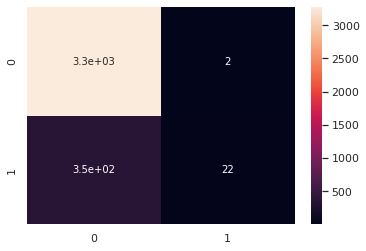

In [80]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

## Precision

In [81]:
print("Precision Score is - ", precision_score(y_test, y_pred))

Precision Score is -  0.9166666666666666


## Recall

In [82]:
print("Recall Score is - ", recall_score(y_test, y_pred))

Recall Score is -  0.058981233243967826


## F1 Score

In [83]:
print("F1 Score is - ", f1_score(y_test, y_pred))

F1 Score is -  0.11083123425692695


## ROC/AUC

In [84]:
auc = roc_auc_score(y_test, y_pred)
print("AUC score:- ", auc)

AUC score:-  0.5291856455942316


## ROC Curve

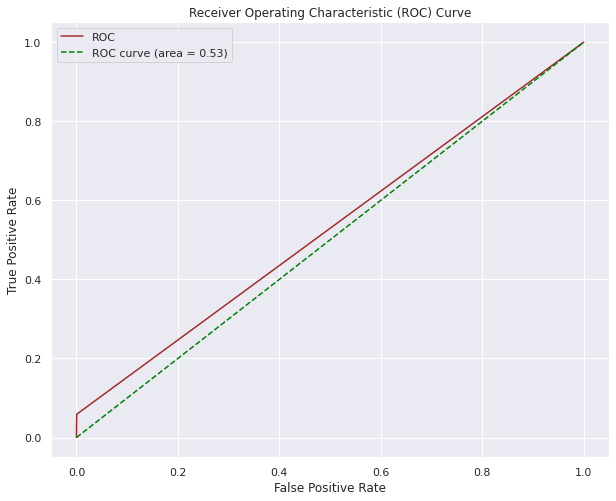

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## K-Fold Cross Validation

In [86]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

In [87]:
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.90689183 0.91282519 0.90917389 0.90684932 0.90684932]



We can summarize the cross-validation accuracy by calculating its mean.

In [88]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9085


### MODEL EVALUATION SUMMARY : 
 
- Model Accuracy : 0.9033
- Precision      : 0.9166
- Recall         : 0.0589
- F1 Score       : 0.1108
- AUC            : 0.5291
- K-Fold         : 0.9083

## Model Understanding

♦ Examining feature_importances is a quick and easy way to comprehend a model's findings. There are several ways to calculate feature importance, however using the Random Forest classifier, we are able to extract feature_importances using the built-in approach on the trained model. feature_importances reflect the importance of a feature within the prediction model. The amount of times each feature is used for splitting across all trees in the Random Forest scenario is represented by the feature importance.

In [89]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

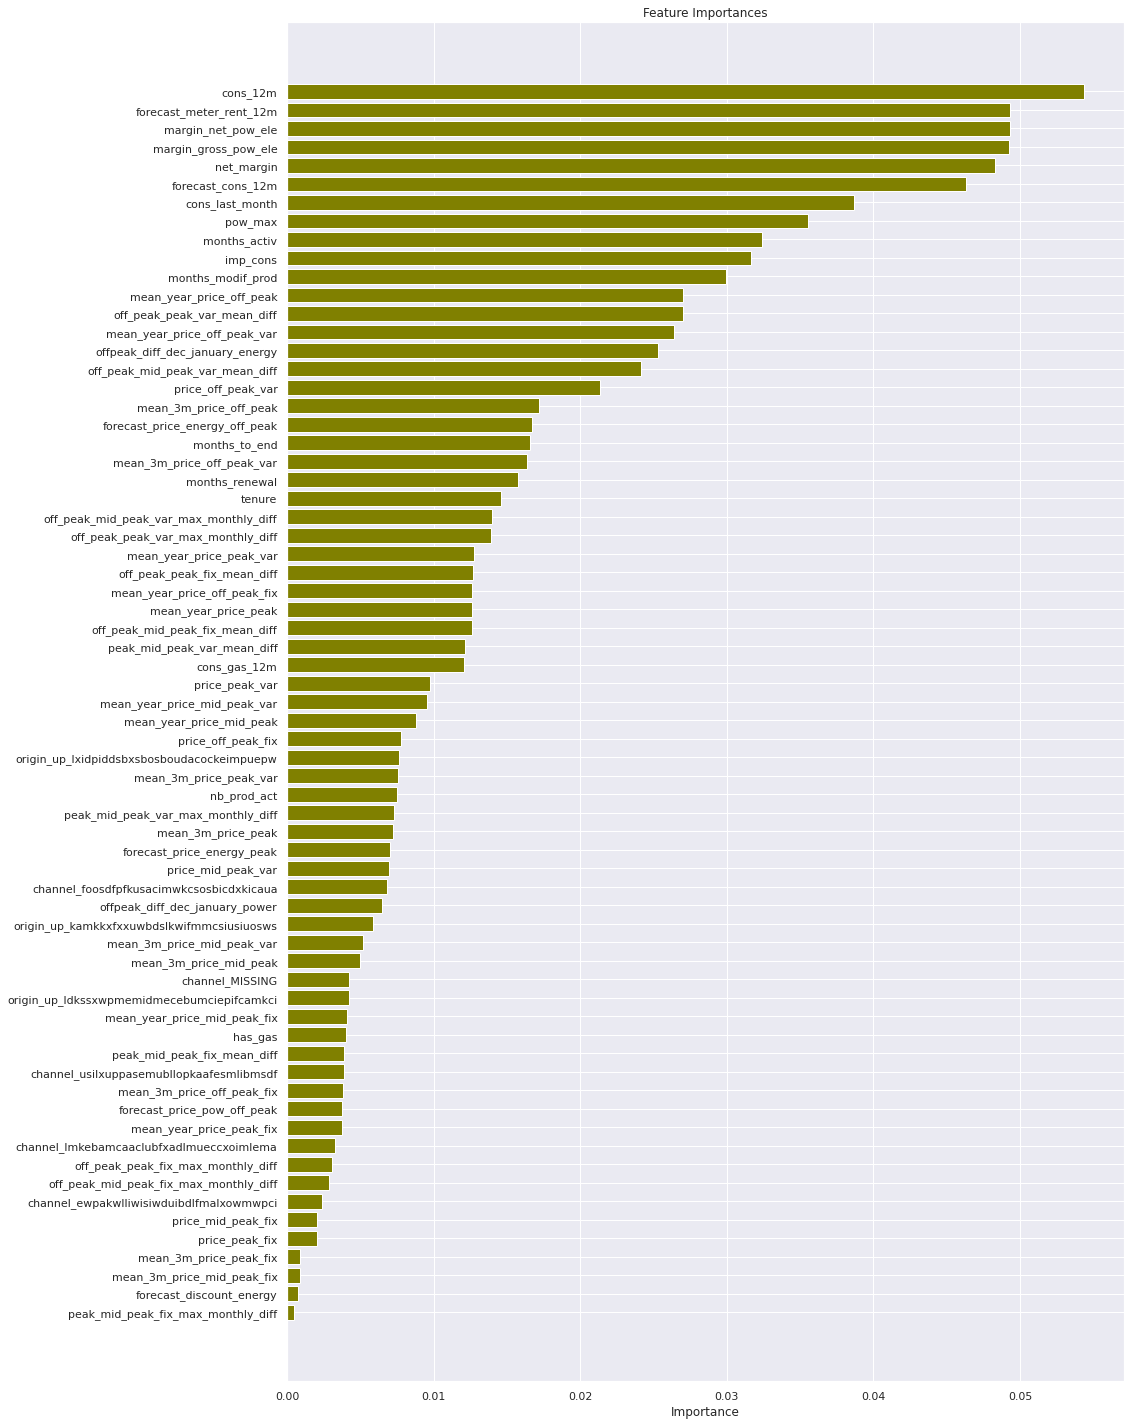

In [90]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin on power subscription and consumption over 12 months is a top driver for churn in this model

- Forecasted bill of meter rental for the next 2 months also is an influential driver

- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract

- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it

- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

> Is churn driven by the customers' price sensitivity ?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [91]:
proba_predictions = rf_classifier.predict_proba(X_test)

In [92]:
probabilities = proba_predictions[:, 1]

In [93]:
X_test = X_test.reset_index()

In [94]:
X_test.drop(columns='index', inplace=True)

## Saving the dataframe to "predicted_data.csv" file

In [95]:
X_test['churn'] = y_pred.tolist()

In [96]:
X_test['churn_probability'] = probabilities.tolist()

In [97]:
X_test.to_csv('predicted_data.csv')

# Business impact of discount

We conduct a brief analysis on the discount strategy proposed. This is just 1 way to solve it, there may be many other ways!

The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

# Workflow

Our task is to calculate the forecast revenue for the set of customers:

- When no discount is offered
- And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount

And hence to decide where the cut-off should be set in order to maximise revenue

# Data loading

In [98]:
test_data = pd.read_csv('predicted_data.csv')

In [99]:
test_data.drop(test_data.columns[0], axis=1, inplace=True)

In [100]:
test_data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  5.705621      0.000000         4.715176           0.000000   
1  6.000648      5.203623         5.050759           2.818932   
2  0.000000      0.000000         0.000000           0.000000   
3  4.345433      0.000000         0.000000           3.516690   
4  3.201943      0.000000         2.484300           2.523109   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 2.166341   
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.120372                    0.103487   
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        0  0.000000                 99.96   
1                    44.311378        1  2.234061                 19.20   
2                    59.173468        0  0.000000                  0.00   
3                    44.311378        0  0.000000                 29.76   
4                    44.311378        0  1.648262                 10.08   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               99.96            1        0.00   40.000   
1               19.20            2       55.09   10.392   
2                0.00            1        0.00    9.900   
3               29.76            1      317.74   13.200   
4               10.08            1       18.25   10.392   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.127558                  0.107086   
1                      0.148958                  0.000000   
2                      0.104044                  0.092514   
3                      0.147965                  0.000000   
4                      0.221441                  0.000000   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.076709                     40.565972   
1                      0.000000                     44.370635   
2                      0.065678                     59.173468   
3                      0.000000                     44.266930   
4                      0.000000                     44.370636   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 24.339579                     16.226385   
1                  0.000000                      0.000000   
2                 36.490689                      8.367731   
3                  0.000000                      0.000000   
4                  0.000000                      0.000000   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 40.693529             24.446665                 16.303095   
1                 44.519593              0.000000                  0.000000   
2                 59.277512             36.583203                  8.433409   
3                 44.414895              0.000000                  0.000000   
4                 44.592077              0.000000                  0.000000   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.124231        0.105422            0.076910           40.565973   
1            0.147532        0.000000            0.000000           44.444710   
2            0.101630        0.091216            0.065678           59.173468   
3            0.146184        0.000000            0.000000           44.266930   
4            0.165348        0.000000            0.000000           44.44

In [101]:
test_data.tail()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
3647  4.244450      3.256477         3.185542           3.253113   
3648  3.854488      0.000000         3.280123           0.000000   
3649  4.480697      4.863531         3.423574           3.478985   
3650  3.931966      3.509874         2.352183           2.914845   
3651  3.441852      0.000000         0.000000           2.360006   

      forecast_discount_energy  forecast_meter_rent_12m  \
3647                       0.0                 2.088313   
3648                       0.0                 0.000000   
3649                       0.0                 2.121822   
3650                       0.0                 1.288249   
3651                       0.0                 1.229938   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
3647                        0.116509                    0.101397   
3648                        0.000600                    0.000000   
3649                        0.115237                    0.100123   
3650                        0.140621                    0.000000   
3651                        0.146694                    0.000000   

      forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
3647                    40.606701        1  2.196121                  0.90   
3648                     0.000000        0  0.000000                 33.12   
3649                    40.606701        1  2.411148                  1.74   
3650                    44.311378        1  1.517460                 22.52   
3651                    44.311378        0  0.000000                 26.04   

      margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
3647                0.90            3      244.31   20.000   
3648               33.12            1       79.33   13.200   
3649                1.74            3      359.42   39.000   
3650               22.52            3       80.41   13.856   
3651               26.04            1       23.74   10.392   

      mean_year_price_off_peak_var  mean_year_price_peak_var  \
3647                      0.125712                  0.105233   
3648                      0.000600                  0.000000   
3649                      0.123638                  0.103159   
3650                      0.144990                  0.000000   
3651                      0.150700                  0.000000   

      mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
3647                      0.075000                     40.565972   
3648                      0.000000                      0.000000   
3649                      0.072926                     40.565972   
3650                      0.000000                     44.355820   
3651                      0.000000                     44.266930   

      mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
3647                 24.339579                     16.226385   
3648                  0.000000                      0.000000   
3649                 24.339579                     16.226385   
3650                  0.000000                      0.000000   
3651                  0.000000                      0.000000   

      mean_year_price_off_peak  mean_year_price_peak  \
3647                 40.691684             24.444812   
3648                  0.000600              0.000000   
3649                 40.689610             24.442738   
3650                 44.500811              0.000000   
3651                 44.417631              0.000000   

      mean_year_price_mid_peak  price_off_peak_var  price_peak_var  \
3647                 16.301385            0.121359        0.102536   
3648                  0.000000            0.000600        0.000000   
3649                 16.299312            0.120298        0.101476   
3650                  0.000000            0.143238        0.000000   
3651                  0.000000            0.148727        0.000000   

      price_mid_peak_var  price_off_peak_fix  price_pe

In [102]:
test_data.sample(10)

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
1287  4.321930      0.000000         0.000000           2.929158   
2554  3.342620      0.000000         2.431364           2.338536   
479   4.598156      4.286816         0.000000           3.587230   
1612  3.890197      0.000000         3.419460           2.939345   
3265  3.502017      0.000000         0.000000           2.674273   
1158  4.423066      5.618774         3.730217           2.350771   
2980  4.349821      0.000000         3.679519           3.518014   
2184  5.954761      0.000000         4.493165           3.669528   
354   5.149148      0.000000         4.042536           2.686842   
2165  3.390051      0.000000         0.000000           2.561411   

      forecast_discount_energy  forecast_meter_rent_12m  \
1287                       0.0                 1.247973   
2554                       0.0                 2.119355   
479                        0.0                 2.087249   
1612                       0.0                 1.224792   
3265                       0.0                 1.311754   
1158                       0.0                 1.238799   
2980                       0.0                 1.007321   
2184                       0.0                 2.168026   
354                        0.0                 2.124243   
2165                       0.0                 1.221414   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
1287                        0.144902                    0.000000   
2554                        0.114603                    0.098261   
479                         0.116491                    0.101395   
1612                        0.165793                    0.088539   
3265                        0.141666                    0.000000   
1158                        0.146694                    0.000000   
2980                        0.142819                    0.000000   
2184                        0.116910                    0.100572   
354                         0.115237                    0.100123   
2165                        0.143459                    0.000000   

      forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
1287                    44.311378        0  0.000000                 24.42   
2554                    40.606701        0  1.428783                 31.32   
479                     40.606701        1  0.000000                  0.72   
1612                    44.311378        0  2.452798                 12.36   
3265                    44.311378        0  0.000000                  7.80   
1158                    44.311378        1  1.655235                 31.64   
2980                    44.311378        0  2.840520                 16.66   
2184                    40.606701        0  2.507883                 21.00   
354                     41.105201        0  1.568202                 43.32   
2165                    46.305378        0  0.000000                 26.02   

      margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
1287               24.42            1       79.93   13.200   
2554               31.32            1       25.51   19.800   
479                 0.72            2      607.79   16.500   
1612               12.36            1       68.89   10.392   
3265                7.80            1       35.98   10.390   
1158               31.64            2       26.16   13.856   
2980               16.66            1      319.32   13.200   
2184               21.00            1      588.03   19.800   
354                43.32            1       52.85   17.321   
2165               26.02            1       25.15   13.200   

      mean_year_price_off_peak_var  mean_year_price_peak_var  \
1287                      0.148958                  0.000000   
2554                      0.123812                  0.103347   
479                       0.123638                  0.103159   
1612                      0.169468                  0.087336

# Calculating a baseline revenue estimate (no intervention)

Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast price and actual churn outcome. Call this basecase_revenue.

- For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call this new variable basecase_revenue_after_churn, ie basecase_revenue_after_churn = basecase_revenue(1 -0.919 churn)


In [103]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

In [104]:
# Taking churn into account

test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])

In [105]:
test_data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  5.705621      0.000000         4.715176           0.000000   
1  6.000648      5.203623         5.050759           2.818932   
2  0.000000      0.000000         0.000000           0.000000   
3  4.345433      0.000000         0.000000           3.516690   
4  3.201943      0.000000         2.484300           2.523109   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 2.166341   
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.120372                    0.103487   
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        0  0.000000                 99.96   
1                    44.311378        1  2.234061                 19.20   
2                    59.173468        0  0.000000                  0.00   
3                    44.311378        0  0.000000                 29.76   
4                    44.311378        0  1.648262                 10.08   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               99.96            1        0.00   40.000   
1               19.20            2       55.09   10.392   
2                0.00            1        0.00    9.900   
3               29.76            1      317.74   13.200   
4               10.08            1       18.25   10.392   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.127558                  0.107086   
1                      0.148958                  0.000000   
2                      0.104044                  0.092514   
3                      0.147965                  0.000000   
4                      0.221441                  0.000000   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.076709                     40.565972   
1                      0.000000                     44.370635   
2                      0.065678                     59.173468   
3                      0.000000                     44.266930   
4                      0.000000                     44.370636   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 24.339579                     16.226385   
1                  0.000000                      0.000000   
2                 36.490689                      8.367731   
3                  0.000000                      0.000000   
4                  0.000000                      0.000000   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 40.693529             24.446665                 16.303095   
1                 44.519593              0.000000                  0.000000   
2                 59.277512             36.583203                  8.433409   
3                 44.414895              0.000000                  0.000000   
4                 44.592077              0.000000                  0.000000   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.124231        0.105422            0.076910           40.565973   
1            0.147532        0.000000            0.000000           44.444710   
2            0.101630        0.091216            0.065678           59.173468   
3            0.146184        0.000000            0.000000           44.266930   
4            0.165348        0.000000            0.000000           44.44

In [106]:
test_data.tail()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
3647  4.244450      3.256477         3.185542           3.253113   
3648  3.854488      0.000000         3.280123           0.000000   
3649  4.480697      4.863531         3.423574           3.478985   
3650  3.931966      3.509874         2.352183           2.914845   
3651  3.441852      0.000000         0.000000           2.360006   

      forecast_discount_energy  forecast_meter_rent_12m  \
3647                       0.0                 2.088313   
3648                       0.0                 0.000000   
3649                       0.0                 2.121822   
3650                       0.0                 1.288249   
3651                       0.0                 1.229938   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
3647                        0.116509                    0.101397   
3648                        0.000600                    0.000000   
3649                        0.115237                    0.100123   
3650                        0.140621                    0.000000   
3651                        0.146694                    0.000000   

      forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
3647                    40.606701        1  2.196121                  0.90   
3648                     0.000000        0  0.000000                 33.12   
3649                    40.606701        1  2.411148                  1.74   
3650                    44.311378        1  1.517460                 22.52   
3651                    44.311378        0  0.000000                 26.04   

      margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
3647                0.90            3      244.31   20.000   
3648               33.12            1       79.33   13.200   
3649                1.74            3      359.42   39.000   
3650               22.52            3       80.41   13.856   
3651               26.04            1       23.74   10.392   

      mean_year_price_off_peak_var  mean_year_price_peak_var  \
3647                      0.125712                  0.105233   
3648                      0.000600                  0.000000   
3649                      0.123638                  0.103159   
3650                      0.144990                  0.000000   
3651                      0.150700                  0.000000   

      mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
3647                      0.075000                     40.565972   
3648                      0.000000                      0.000000   
3649                      0.072926                     40.565972   
3650                      0.000000                     44.355820   
3651                      0.000000                     44.266930   

      mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
3647                 24.339579                     16.226385   
3648                  0.000000                      0.000000   
3649                 24.339579                     16.226385   
3650                  0.000000                      0.000000   
3651                  0.000000                      0.000000   

      mean_year_price_off_peak  mean_year_price_peak  \
3647                 40.691684             24.444812   
3648                  0.000600              0.000000   
3649                 40.689610             24.442738   
3650                 44.500811              0.000000   
3651                 44.417631              0.000000   

      mean_year_price_mid_peak  price_off_peak_var  price_peak_var  \
3647                 16.301385            0.121359        0.102536   
3648                  0.000000            0.000600        0.000000   
3649                 16.299312            0.120298        0.101476   
3650                  0.000000            0.143238        0.000000   
3651                  0.000000            0.148727        0.000000   

      price_mid_peak_var  price_off_peak_fix  price_pe

In [107]:
test_data.sample(10)

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
3570  4.209997      0.000000         0.000000           0.000000   
2037  3.152900      2.583199         0.000000           0.000000   
2398  3.913231      0.000000         0.000000           3.083384   
516   3.848435      0.000000         2.761928           2.550155   
1739  4.268274      0.000000         3.235023           3.137516   
2834  3.521661      0.000000         2.819544           0.000000   
1597  3.414472      0.000000         0.000000           2.591532   
2653  3.892873      0.000000         2.952792           3.067101   
3398  2.764923      0.000000         0.000000           1.930032   
472   4.965705      0.000000         3.939419           3.891867   

      forecast_discount_energy  forecast_meter_rent_12m  \
3570                       0.0                 0.000000   
2037                       0.0                 2.560612   
2398                       0.0                 1.266937   
516                        0.0                 1.287130   
1739                       0.0                 2.122445   
2834                       0.0                 2.123198   
1597                       0.0                 1.235276   
2653                       0.0                 1.663418   
3398                       0.0                 1.611298   
472                        0.0                 2.162654   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
3570                        0.000600                    0.000000   
2037                        0.092453                    0.086393   
2398                        0.143459                    0.000000   
516                         0.144038                    0.000000   
1739                        0.116900                    0.100015   
2834                        0.092453                    0.086393   
1597                        0.145711                    0.000000   
2653                        0.145711                    0.000000   
3398                        0.140621                    0.000000   
472                         0.114017                    0.097679   

      forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
3570                     0.000000        0  0.000000                 19.88   
2037                    59.173468        1  0.000000                  0.12   
2398                    45.308378        0  0.000000                 15.78   
516                     46.305378        0  0.000000                 24.62   
1739                    40.606701        0  2.081023                 29.91   
2834                    59.173468        0  0.000000                  0.00   
1597                    44.311378        0  0.000000                 16.92   
2653                    44.311378        0  2.120969                 16.13   
3398                    44.311378        0  0.000000                 15.72   
472                     40.606701        0  2.869320                 50.56   

      margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
3570               19.88            1      177.26   13.200   
2037                0.12            2        0.00   41.500   
2398               15.78            1       99.56   13.856   
516                24.62            1       29.30   12.500   
1739               29.91            1      152.90   16.500   
2834                0.00            1        0.00    9.900   
1597               16.92            1       38.83   10.392   
2653               16.13            1       87.18   11.430   
3398               15.72            1        6.89   13.200   
472                50.56            1      800.63   64.000   

      mean_year_price_off_peak_var  mean_year_price_peak_var  \
3570                      0.000600                  0.000000   
2037                      0.104044                  0.092514   
2398                      0.146975                  0.000000   
516                       0.149392                  0.000000

# Calculate the estimated benefits and costs of intervention

Now, pick a cut-off probability (eg 0.5) so that:

- Customers with a higher churn probability than the cut-off get a discount, and
- Customers below the churn-probability do not get a discount.

From this, calculate the revenue of the intervention scenario assuming:

- All customers who are offered a discount accept it
- Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained

revenue is 0.8basecase_revenue , being (1-discount_fraction)basecase_revenue

- Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually

churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer's cost goes down then their consumption might increase. We will see two counterbalancing effects at play:

- For true positives we will see revenue retention vs the no-discount scenario
- For false positives we will see reduced revenue from giving them a discount when they wouldn't in fact churn.

(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [108]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

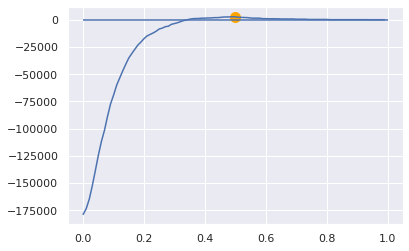

Maximum benefit at cutoff 0.5 with revenue delta of $2,750.02


In [109]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

# Optional extra: how to select the cut-off?

Above, we decided who to offer the discount to based on a probability cut-off. Is this the optimal strategy?

- For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.

- Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).

A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher. A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [110]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

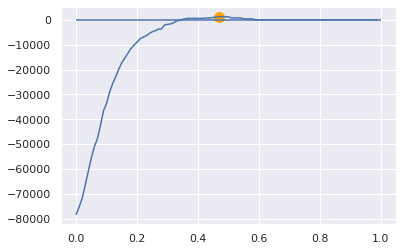

Maximum benefit at cutoff 0.47000000000000003 with revenue delta of $1,250.52


In [111]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

**Note:**

- In this case, it doesn't make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn't depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn.

- There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs, even if the delta in the figure above is reduced.

# Optional extra: Using forecast rather than actual churn

We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (churn) with the predicted probability of churn from our model. The results here are obviously model-dependent.

If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

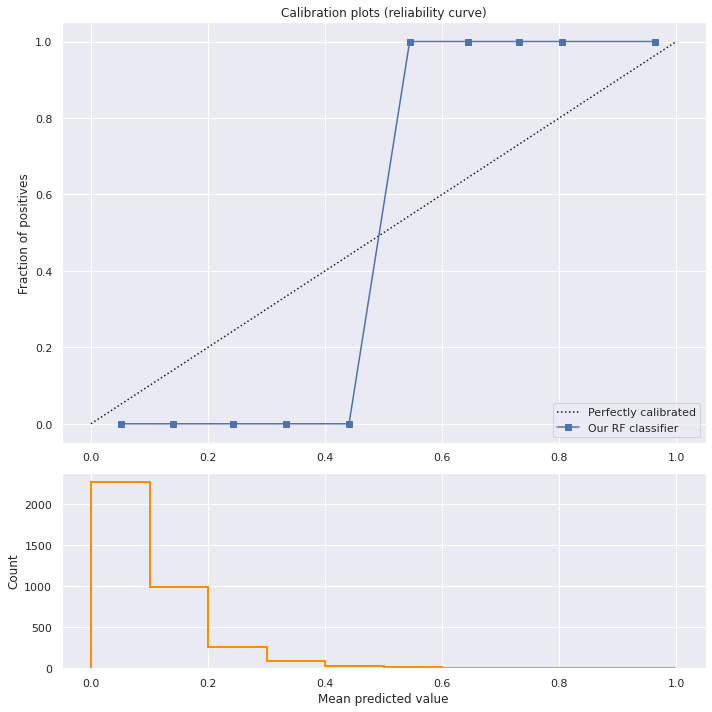

In [112]:
# Check our calibration

from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_data['churn'],
    y_prob=test_data['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_data['churn_probability'], range=(0, 1), bins=10, color='darkorange', histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

This chart tells us a few things:
- The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier.
- The bottom chart shows us that the model is postively skewed toward predicting a probability, perhaps due to having such low confidence.

In [113]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = np.power(10, test_data['forecast_cons_12m']) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

In [114]:
# Taking churn into account

test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn_probability'])

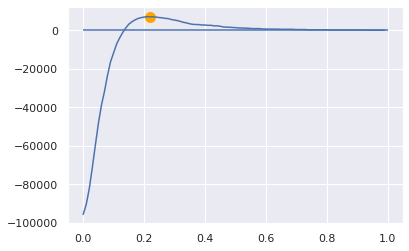

Maximum benefit at cutoff 0.22 with revenue delta of $7,003.30


In [115]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas

rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)